# Focus stacking with image batches

based on [Laplacian pyramids method](https://github.com/sjawhar/focus-stacking).

**Resources:**

* [Pyramid Methods in Image Processing](https://www.researchgate.net/publication/246727904_Pyramid_Methods_in_Image_Processing), E. H. Adelson, C. H. Anderson,  J. R. Bergen, P. J. Burt, J. M. Ogden, RCA Engineer, 29-6, Nov/Dec 1984
Pyramid methods in image processing
* [A Multi-focus Image Fusion Method Based on Laplacian Pyramid](http://www.jcomputers.us/vol6/jcp0612-07.pdf), Wencheng Wang, Faliang Chang, Journal of Computers 6 (12), 2559, December 2011
* [Original core implementation on GitHub](https://github.com/bznick98/Focus_Stacking) by Zongnan Bao
* [Align with OpenCV](https://magamig.github.io/posts/accurate-image-alignment-and-registration-using-opencv/)
* [Balancing contrast and brightness between stitched images](https://itecnote.com/tecnote/opencv-balancing-contrast-and-brightness-between-stitched-images/)

In [1]:
from focus_stack import *

In [2]:
job = StackJob("job", "E:/Focus stacking/2024-04-05 - Aphid/")
job.add_action(AlignLayers(job.working_directory, "align", input_path="Immagini modificate"))
job.add_action(BalanceLayersLumi(job.working_directory, "balance", input_path="align", mask_radius=0.8, i_min=10, i_max=255))
job.add_action(FocusStackBunch(job.working_directory, "bunches", PyramidStack(), input_path="balance", exif_dir="Immagini modificate", frames=10, overlap=2, denoise=0.8))
job.add_action(FocusStack(job.working_directory, "stack", PyramidStack(), input_path="bunches", exif_dir="Immagini modificate", postfix='_stack_pyr', denoise=0.8))

running align
62 files in folder: 'E:/Focus stacking/2024-04-05 - Aphid/Immagini modificate'


align:   0%|          | 0/62 [00:00<?, ?it/s]

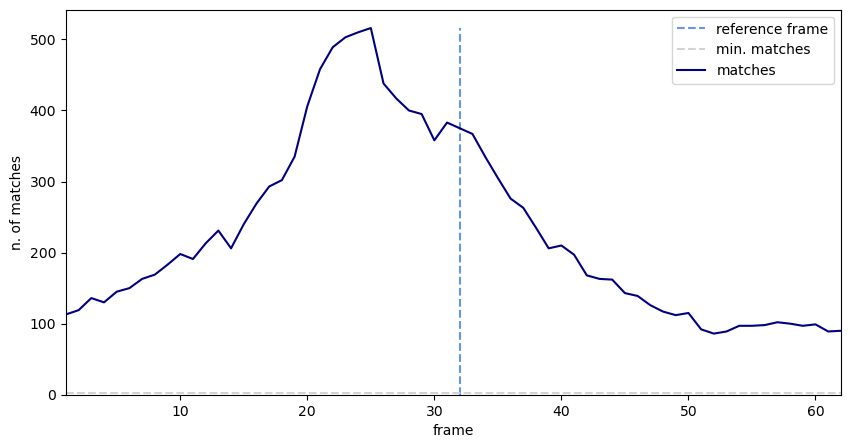

align: elapsed time: 00:04:00.18s                    
align completed                    
running balance
62 files in folder: 'E:/Focus stacking/2024-04-05 - Aphid/align'


balance:   0%|          | 0/62 [00:00<?, ?it/s]

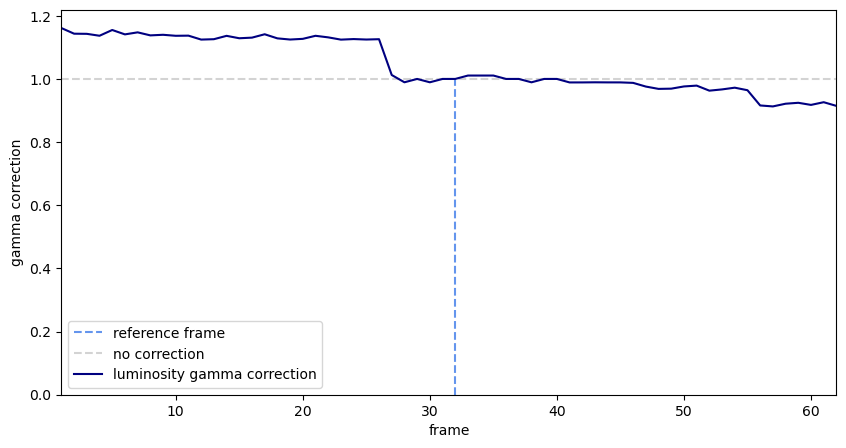

balance: elapsed time: 00:00:36.65s                    
balance completed                    
running batches


batches:   0%|          | 0/8 [00:00<?, ?it/s]

batches: elapsed time: 00:06:23.98s                    
batches completed                    
running stack
8 files in folder: 'E:/Focus stacking/2024-04-05 - Aphid/batches'
stack: elapsed time: 00:00:41.88s                    
stack completed                    
job: elapsed time: 00:11:42.69s                    
job completed                    


In [3]:
job.run()